In [22]:
import pandas as pd 
import numpy as np 
import os
import sys
sys.path.append(os.path.abspath(".."))
from limma import batchEffectCorrection
from MetNormalizer import MetNorm
#Combat Reference
from inmoose.pycombat import pycombat_norm
from utils.utility_functions import *
from sklearn.model_selection import GridSearchCV

**preprocess data**
1. set index as signal position

2. remove additional metadata from original data matrix

3. set corresponding metadata index for matching

4. remove blanks and outlier sample  

removing blanks
returning accepted signals


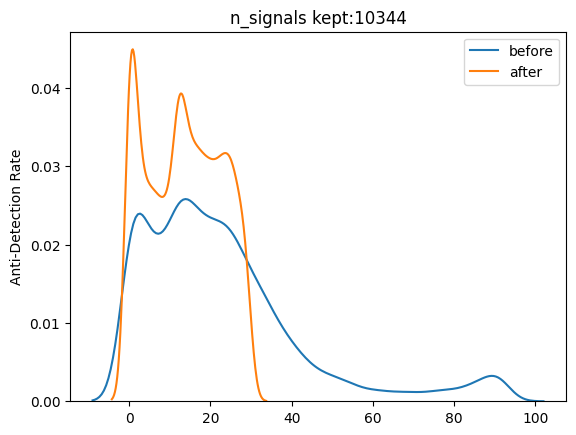

In [10]:
D = pd.read_csv("Data/2-peak_area_after_filling_missing_values.csv").set_index("position").drop(columns=['mz','rt','name']).T
M = pd.read_csv("Data/sample_metadata_all_batches.csv").set_index("sample_name")
D = D[~D.index.str.contains("_B_")]
M = M[~M.index.str.contains("_B_")]
D = D.drop(index='AOU_S_0104')
M = M.drop(index='AOU_S_0104')
D = D[detection(D).index]
D = TIC(D,scale=True)

In [11]:
D.head()

position,5955,12172,6286,10673,4101,9189,12542,10987,13114,2242,...,1160,6355,2359,3635,374,1173,372,1178,9295,2565
AOU_NIST_001,57.702159,8375.993005,28532.406421,57.702159,57.702159,31203.754120,11756.814982,57.702159,57.702159,57.702159,...,1.646313e+06,34060.011011,344652.375398,335228.563634,2.341548e+06,451594.147996,4.972814e+06,609012.195961,5030.579171,578537.587310
AOU_NIST_004,54.965100,2177.367481,81885.506803,13670.070190,54.965100,54.965100,54.965100,11324.059789,2590.854937,54.965100,...,2.197908e+06,33035.274255,74782.516846,386819.389054,3.908623e+06,500401.020405,5.341863e+06,510370.940005,9169.178031,684697.751207
AOU_HHEAR_P1_001,36.756080,4761.583093,52987.230809,8324.416759,36.756080,36.756080,7716.270708,8627.654419,36.756080,36.756080,...,6.105452e+05,22122.147979,201162.684482,29418.229862,1.958260e+06,576042.121422,7.617781e+04,8528.245930,4139.235829,416969.325389
AOU_HHEAR_P2_010,37.216648,2076.519819,16477.671120,7055.092388,37.216648,7525.375492,11100.711246,37.216648,5653.547239,37.216648,...,7.116593e+05,21086.614703,182362.423445,80006.490096,1.728156e+06,520276.058427,3.311622e+05,10378.369932,2191.553096,547870.511619
AOU_SP_001,24451.436300,11259.998410,29733.519363,40.391320,54488.808548,33654.231349,6183.543885,14724.472078,4063.917574,308699.842283,...,1.102071e+06,21141.184036,261043.592693,154187.437877,2.414893e+06,468153.757487,1.109937e+06,321897.706065,2314.239034,555645.028357


In [12]:
M.head()

,injection_order,sample_type,sample_type_original,batch,batch_folder
sample_name,,,,,
AOU_NIST_001,2,nist,nist,1,AOU_0001
AOU_HHEAR_P1_001,3,hhear p1,hhear p1,1,AOU_0001
AOU_SP_001,4,sp,sp,1,AOU_0001
AOU_S_0001,5,study,study,1,AOU_0001
AOU_S_0002,6,study,study,1,AOU_0001


**Uncorrected Data**

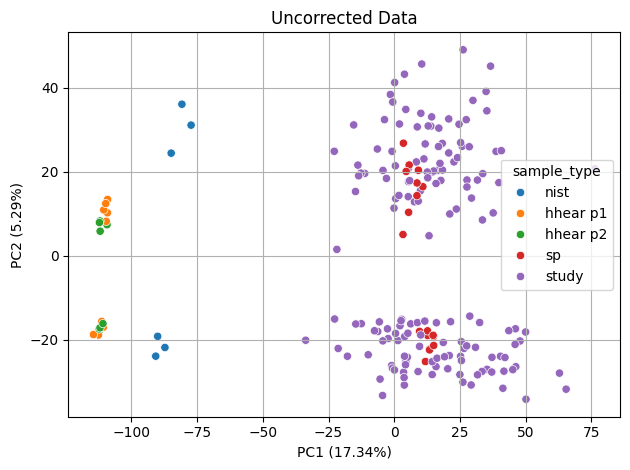

In [13]:
pca_plot(D,M,title='Uncorrected Data',hue='sample_type')

**Combat - Reference**

In [14]:
batch = M.loc[D.index,'batch']
combat = pycombat_norm(D.T,batch)

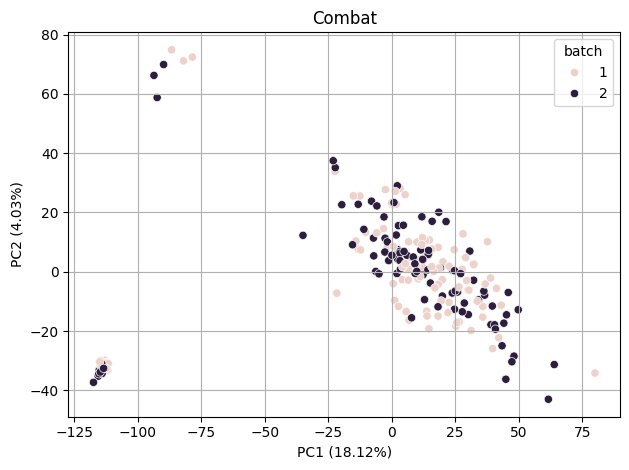

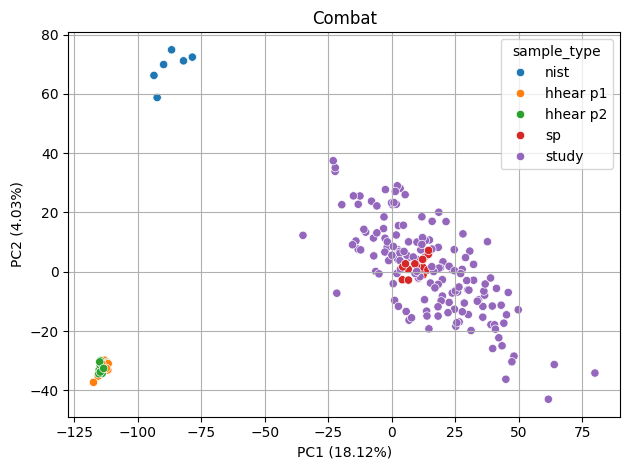

In [15]:
pca_plot(combat.T,M,hue='batch',title='Combat')
pca_plot(combat.T,M,hue='sample_type',title='Combat')

**Limma**

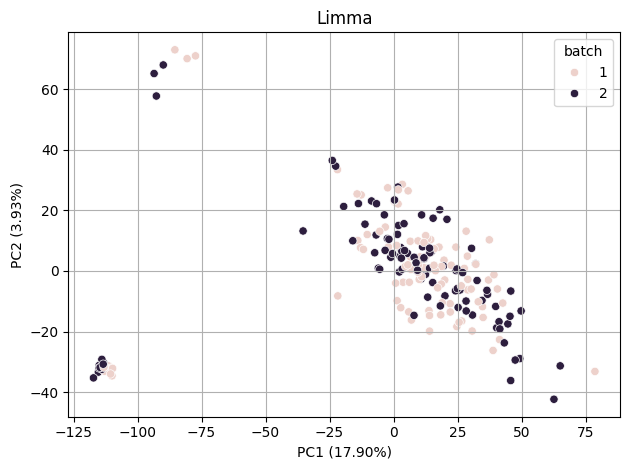

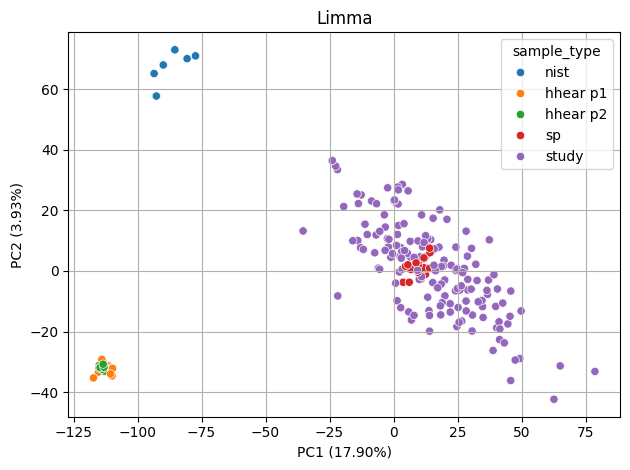

In [16]:
limma = batchEffectCorrection(D.T,M)
pca_plot(limma,M,title="Limma",hue='batch')
pca_plot(limma,M,title="Limma",hue='sample_type')

**MetNormalizer**

In [24]:
metnorm = MetNorm(D,M,cv=True)
results = metnorm.fit_transform()

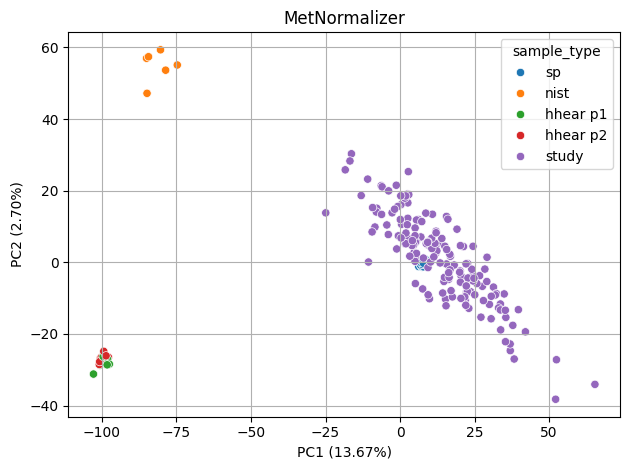

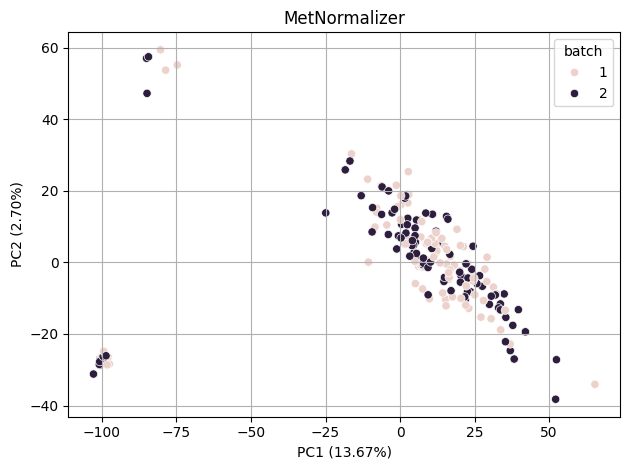

In [25]:
pca_plot(results,M,hue='sample_type',title='MetNormalizer')
pca_plot(results,M,hue='batch',title='MetNormalizer')

**SERRF**

- Developed using separate multiprocessing script. Only results displayed below.

- Total Elapsed Time: [1:26:23<00:00,  2.69it/s]

![SERRF Output](<figures/serrf_output.png>)

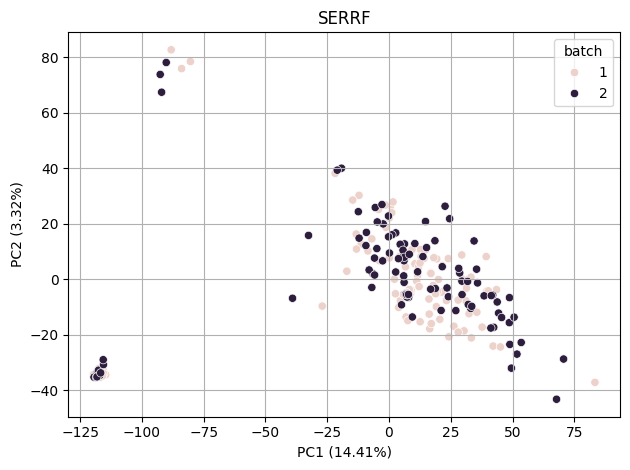

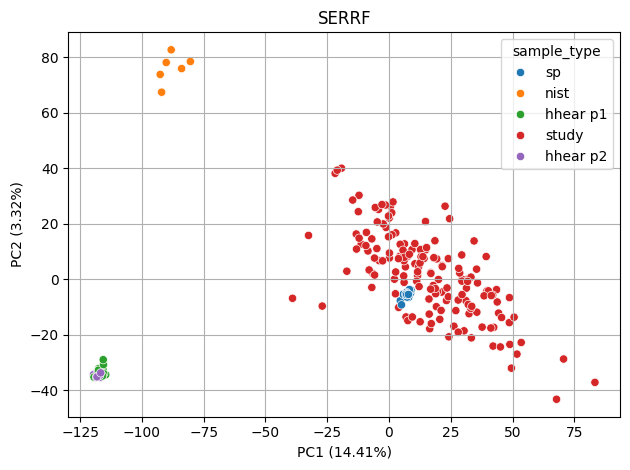

In [19]:
serrf = pd.read_csv("Data/serrf_imp.csv").reset_index()
serrf = serrf.rename(columns={"Unnamed: 0":'name'})
serrf = serrf.drop(columns=['index'])
serrf = serrf.set_index("name")
pca_plot(serrf,M,hue='batch',title='SERRF')
pca_plot(serrf,M,hue='sample_type',title='SERRF')